In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
import cv2

In [2]:
from utils.preprocessor import *

In [3]:
image = np.array(cv2.imread("data/2135041009/back.jpg"))

In [4]:
output = extract_contour_for_dim_image(image)

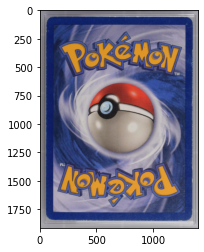

In [5]:
%matplotlib inline
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

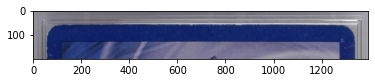

In [47]:
plt.imshow(cv2.cvtColor(output[:200,:,:], cv2.COLOR_BGR2RGB))

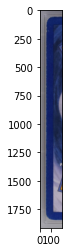

In [48]:
plt.imshow(cv2.cvtColor(output[:,:200,:], cv2.COLOR_BGR2RGB))

In [49]:
left = cv2.cvtColor(output[:,:200,:], cv2.COLOR_BGR2RGB)
right = cv2.cvtColor(output[:,-200:,:], cv2.COLOR_BGR2RGB)
top = cv2.cvtColor(output[:200,:,:], cv2.COLOR_BGR2RGB)
bottom = cv2.cvtColor(output[-200:,:,:], cv2.COLOR_BGR2RGB)

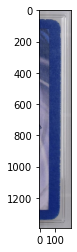

In [63]:
plt.imshow(rotate(bottom, 90))

In [7]:
def pad_card(image : np.ndarray, desire_shape : tuple):
    height, width, _ = image.shape
    desire_height = desire_shape[0]
    desire_width = desire_shape[1]
    top = int((desire_height - height) / 2)
    bottom = int((desire_height - height) / 2) + ((desire_height - height) % 2)
    left = int((desire_width - width) / 2)
    right = int((desire_width - width) / 2) + ((desire_width - width) % 2)

    return cv2.copyMakeBorder(
        image, 
        top, 
        bottom, 
        left, 
        right, 
        cv2.BORDER_CONSTANT,
        None,
        value = 0
    )

In [8]:
card = output
left = rotate(card[:,:200,:], 180)
right = card[:,-200:,:]
top = rotate(card[:200,:,:],-90)
bottom = rotate(card[-200:,:,:],90)
max_height = max(left.shape[0],right.shape[0], top.shape[0], bottom.shape[0])
max_width = max(left.shape[1],right.shape[1], top.shape[1], bottom.shape[1])
# pad top and bottom 
edges = tuple([pad_card(x, (max_height, max_width)) for x in [left, right, top, bottom]])
split_card = np.concatenate(edges, axis = 1)

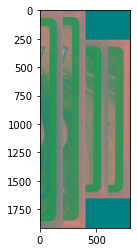

In [16]:
plt.imshow(cv2.cvtColor(split_card, cv2.COLOR_BGR2LAB))